In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import wordcloud 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [21]:
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [11]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data.head()
#data = data[['text','sentiment']]

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [12]:
data_new=data.head(1000)
data_new

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,No candidate mentioned,1.0000,yes,1.0000,Negative,0.3685,None of the above,1.0000,NaN,...,NaN,621,NaN,NaN,RT @nerdist: I gotta say it's refreshing to he...,NaN,2015-08-07 09:46:10 -0700,629695037094256640,"Phoenix, AZ, USA",Pacific Time (US & Canada)
996,997,No candidate mentioned,0.4298,yes,0.6556,Negative,0.3444,None of the above,0.4298,NaN,...,NaN,8,NaN,NaN,RT @GogoAleee: IG Deleted DD Account after we ...,NaN,2015-08-07 09:46:10 -0700,629695036385529856,NaN,Eastern Time (US & Canada)
997,998,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @CrazyClarine: lol! RT @The3o5FlyGuy: Watch...,NaN,2015-08-07 09:46:09 -0700,629695034246451200,NaN,NaN
998,999,No candidate mentioned,0.4955,yes,0.7039,Negative,0.7039,None of the above,0.4955,NaN,...,NaN,107,NaN,NaN,RT @sjadetx: My thoughts on the #GOPDebate htt...,NaN,2015-08-07 09:46:08 -0700,629695028810485761,540,Atlantic Time (Canada)


In [13]:
datas=data_new[['id','text']]
datas

,id,text
0,1,RT @NancyLeeGrahn: How did everyone feel about...
1,2,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,3,RT @TJMShow: No mention of Tamir Rice and the ...
3,4,RT @RobGeorge: That Carly Fiorina is trending ...
4,5,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
...,...,...
995,996,RT @nerdist: I gotta say it's refreshing to he...
996,997,RT @GogoAleee: IG Deleted DD Account after we ...
997,998,RT @CrazyClarine: lol! RT @The3o5FlyGuy: Watch...
998,999,RT @sjadetx: My thoughts on the #GOPDebate htt...


In [37]:
fsen=[]
fval=[]
for i in datas.text:
    print('------------------------')
    lower_case = i.lower()
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    #print(cleaned_text)
    tokenized_words = word_tokenize(cleaned_text, "english")
    final_words = []
    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)
    #print(final_words)
    lemma_words = []
    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    #print(lemma_words)
    h=[]
    for ir in lemma_words:
        if len(ir)>2:
            h.append(ir)
    #print(h)
    
    h1 = [word for word in h
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    #print(h1)
    
    h2=[]
    for i in h1:
        if '...' not in i:
            h2.append(i)
    #print(h2)
    
    f1=''
    for i in h2:
        f1=f1+' '+i
    print(f1)
    #print(type(f1))
    
            
    
    score = SentimentIntensityAnalyzer().polarity_scores(f1)
    
    if score['neg'] > score['pos']:
        val='Negative'
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        val='positive'
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")
        val='Neutral'
        
    fsen.append(f1)
    fval.append(val)
        
    
        
    
        
        

------------------------
 nancyleegrahn everyone feel climate change question last night exactly gopdebate
Neutral Sentiment
------------------------
 scottwalker didnt catch full gopdebate last night scott best line second walker16
Positive Sentiment
------------------------
 tjmshow mention tamir rice gopdebate held cleveland wow
Positive Sentiment
------------------------
 robgeorge carly fiorina trending hour debate men justcompleted gopdebate say shes
Neutral Sentiment
------------------------
 danscavino gopdebate realdonaldtrump delivered highest rating history presidential debate trump2016
Neutral Sentiment
------------------------
 gregabbotttx tedcruz first day rescind every illegal executive action taken barack obama gopdebate foxnews
Negative Sentiment
------------------------
 warriorwoman91 liked happy heard going moderator anymore gopdebate megynkelly
Positive Sentiment
------------------------
 going msnbc live thomasaroberts around gopdebate
Neutral Sentiment
---------

Positive Sentiment
------------------------
 fox news gopdebate agenda promote carly never mention fired fiorina amp run trump race
Positive Sentiment
------------------------
 hlllary one thing anyone hear anything affordable child care working family last night gopdebate
Positive Sentiment
------------------------
 naughtybeyotch allenwestrepub dear jebbush gopdebate notamistake
Positive Sentiment
------------------------
 marthamaccallum billhemmer gopdebate bill martha team first debate 2nd debate ambush
Neutral Sentiment
------------------------
 country going hell megyn kelly foxnews attacking trump war woman gopdebate
Negative Sentiment
------------------------
 franklingraham 1st gopdebateencouraging see several candidate express faith god son jesus christ
Positive Sentiment
------------------------
 snarkydemo donaldtrump said politically correct course trumpspeak let face huge asshole
Positive Sentiment
------------------------
 bipartisanism message gopdebate candidate
Neutr

 peddoc63 carly📢 carly📢 carly📢 carlyfiorina carly2016 gopdebate flyoverculture leahr77 steph93065 maydnusa
Neutral Sentiment
------------------------
 daenerys listening gopdebate like
Positive Sentiment
------------------------
 scorpionspriest best moment gopdebate last night rand telling christie get another hug obama
Positive Sentiment
------------------------
 johnfugelsang missed either gopdebate need know there struggling american unlimited war
Negative Sentiment
------------------------
 pfikac jebbush verge greatest time alive world washington holding back mysa txlege
Positive Sentiment
------------------------
 drmartyfox trump win drudge debate poll landslide tedcruz gopdebate pjnet🇺🇸
Positive Sentiment
------------------------
 siteroi governorperry fight back abt immigration say border porous must fixed first
Negative Sentiment
------------------------
 summary gopdebate status quo shit show
Negative Sentiment
------------------------
 thepatriot143 debbie block tweeter qu

Negative Sentiment
------------------------
 larhunter donald trump win election well know biffstolethealmanac timeline gopdebate
Positive Sentiment
------------------------
 carlyfiorina chip keep momentum going gopdebate carly2016
Neutral Sentiment
------------------------
 cenkuygur chris christie said work two year retiringand youll get ten thousand paid…
Neutral Sentiment
------------------------
 johnkasich john kasich ready lead join team claire gopdebate
Positive Sentiment
------------------------
 edwrather biggest loser debate fox moderator attacked instead moderating gopdebate
Negative Sentiment
------------------------
 whitneyneal trump yet give single evidencebased answer direct question policy frighten gopdeb…
Negative Sentiment
------------------------
 way studio appear cnn discus last night gopdebate tune
Neutral Sentiment
------------------------
 blkfeminst honestly think sometimes guy forgot came womb kkkorgop gopdebate
Positive Sentiment
------------------------
 

Positive Sentiment
------------------------
 jediane9 ugh think actually people sitting couch last night saying yes yes reasonable gopdebate
Positive Sentiment
------------------------
 barracudamama allenwestrepub dear jebbush gopdebate notamistake
Positive Sentiment
------------------------
 kesgardner politics even partially rational trump campaign gop nomination ended gopdebate
Neutral Sentiment
------------------------
 andrewhclark gaypatriots takeaway last night america doesnt deserve ben carson gopdebate
Neutral Sentiment
------------------------
 chrisjzullo scott walker chooses killing mother rather aborting unborn embryo reason country give funny
Negative Sentiment
------------------------
 cant uniteblue abortion talking point gopdebate since ppsellsbabyparts
Neutral Sentiment
------------------------
 kmcq closing statement reminisce america longer exists ted kennedy 1965 immigration nationality act
Neutral Sentiment
------------------------
 lkwdcitizen cant make chris ch

Positive Sentiment
------------------------
 megynkelly gopdebate kelly role model doesnt speak prof friend rosie real woman carlyfiorina kelly poser
Negative Sentiment
------------------------
 donald trump whatajoke gopdebate
Neutral Sentiment
------------------------
 funnyordie feel like fox news tried cool parent let kid party amp house fire gopdeba…
Positive Sentiment
------------------------
 patriotmom61 unconscionable foxnews moderator asked candidate except santorum foreign policyamp nat sec question
Neutral Sentiment
------------------------
 chipmarks14 military social experiment purpose kill people break thing mike huckabee gopdebate
Negative Sentiment
------------------------
 crissghoul pro life pro control pro religion pro never mother gopdeba…
Neutral Sentiment
------------------------
 redstatejake solid debate tip take gander gop gopdebate teaparty tcot tlot icon
Positive Sentiment
------------------------
 johnkasich creating job greatest moral purpose strengthen fa

 john kasich seems like decent guy shame hell drowned loony gop gopdebate
Negative Sentiment
------------------------
 feministabulous feeling trump gopdebate
Positive Sentiment
------------------------
 deray end bingo gopdebate
Neutral Sentiment
------------------------
 chris christie said appointed attorney sept 2001 actually appointed dec 2001 gopdebate
Neutral Sentiment
------------------------
 chris christie fundamentally misunderstands 4th amendment amp got owned randpaul nsa gopdebate
Negative Sentiment
------------------------
 cmclymer fun fact party super patriot single candidate stage served day military gopdebate
Positive Sentiment
------------------------
 realalexjones realalexjones taking twitter question gopdebate 3rd today show watch live 11am2pm
Neutral Sentiment
------------------------
 kelkulus surprise twist kevin spacey appears stage tap ring podium push candidate front train…
Positive Sentiment
------------------------
 exjon essmailpatricia cuffymeh trump su

 megynkelly think high rating foxnews gopdebate hate break honey…realdonaldtrump
Negative Sentiment
------------------------
 walked restaurant last night even meal came feeling sick stomach gopdebate
Negative Sentiment
------------------------
 winner gopdebate far concerned carlyfiorina johnkasich realbencarson marcorubio
Positive Sentiment
------------------------
 alexisinnh two debate one winner carly carly2016 gopdebate
Positive Sentiment
------------------------
 gopdebate debate stage filled liar traitor doubletalking cheater deceiving misogynist stunk high heaven
Negative Sentiment
------------------------
 played gopdebate survivor carlyfiorina bobbyjindal replace chrischristie amp govmikehuckabee gannett
Positive Sentiment
------------------------
 writeintrump anyone know megan kelly pissed gopdebate pretty sure never married
Positive Sentiment
------------------------
 jayedilla surprise surprise govmikehuckabee think trans life social experiment gopdebate
Positive Sentime

Negative Sentiment
------------------------
 trump lead show low bar gop nomination amp speaks base approval elected leader gopdebate uniteblue
Positive Sentiment
------------------------
 old tiresome gop tcot republican debate blow gopdebate sanders2016
Neutral Sentiment
------------------------
 pharris830 shareaholic thats extreme violates first amendment gopdebate
Negative Sentiment
------------------------
 winning cruzcrew keep tedcruz2016 gopdebate
Positive Sentiment
------------------------
 here frustrating watch gopdebate woman via huffpostwomen
Negative Sentiment
------------------------
 contgopdebate loser rand randpaul combative mean realdonaldtrump fix biggest loser foxnews credibility
Negative Sentiment
------------------------
 imraansiddiqi jeb bush gon earn said bush ever gopdebate
Neutral Sentiment
------------------------
 megynkelly realbencarson thing politically correct war gopdebate
Negative Sentiment
------------------------
 anergoteacher imagine trump admin

 shame foxnews making first primary debate ratingsbonanza win voter lose gopdebate tcot
Negative Sentiment
------------------------
 donniewahlberg love seeing straightouttacompton movie preview gopdebate seen next hour
Positive Sentiment
------------------------
 chronfalkenberg military social experiment purpose military kill people break thing huckabee sa…
Negative Sentiment
------------------------
 fact checking recovering last night drinkinggame gopdebate
Neutral Sentiment
------------------------
 gopdebate fox news try dump trump
Negative Sentiment
------------------------
 inquisition debate say sen graham fox news moderator questioning realdonaldtrump gopdebate
Negative Sentiment
------------------------
 didnt like scottwalker debate like even gopdebate
Negative Sentiment
------------------------
 keep trying aint working ppl saw focus group amp foxnews last night gopdebate
Neutral Sentiment
------------------------
 amazing marco rubio school chriscuomo life begin prolife g

Positive Sentiment
------------------------
 learned cant watch gop bed nightmare gopdebate gopdebacle
Neutral Sentiment
------------------------
 foxnews brithume best closing statement realbencarsons gopdebate kellyfile agree
Positive Sentiment
------------------------
 oooh fox news also doesnt want trump president gopdebate
Negative Sentiment
------------------------
 mschmidtrtd gop leader praise debate performance trump much election2016 gopdebate
Positive Sentiment
------------------------
 gopdebate constant already committed candidate believe gored last night tcot
Positive Sentiment
------------------------
 yaleclimatecomm jerrybrowngov peep take oil amp gas would actonclimate gopdebate
Neutral Sentiment
------------------------
 stevedeaceshow since ronald reagan tedcruz definitely nominee conservative waiting tcot gopdebate cruzcrew
Positive Sentiment
------------------------
 walker kept point tight clean want see run clock longer next debate gopdebate
Positive Sentiment
-

Positive Sentiment
------------------------
 einial rubios ear get bigger debate gopdebate
Neutral Sentiment
------------------------
 kasichwilliams 2016 gopdebate
Neutral Sentiment
------------------------
 first gopdebate social medium reaction
Neutral Sentiment
------------------------
 murphttam miss gopdebate last night dont fear ive got covered recap
Positive Sentiment
------------------------
 would really let mother die rather abortion seriously asked presidential hopeful 2015 gopdebate
Negative Sentiment
------------------------
 tajmagruder say gop bashing hillaryclinton campaign platform gopdebate
Neutral Sentiment
------------------------
 danscavino icymi realdonaldtrump morningjoe morningmika discussing gopdebate trump2016 makeamericagreatagain
Neutral Sentiment
------------------------
 kylebrandt gopdebate fox made megynkelly play woman victim wasnt professional raging night
Positive Sentiment
------------------------
 early2000s political theater wbillionaires bush go

Positive Sentiment
------------------------
 winner gopdebate sen marcorubio amp former ceo carlyfiorina far best republican presidential candidate
Positive Sentiment
------------------------
 nancyleegrahn gopdebate giant commercial hillaryclinton president thank god
Positive Sentiment
------------------------
 daveanthony chewbacca roaring every would fit right gopdebate
Positive Sentiment
------------------------
 gopdebate field seems terrified mentioning obama negative light
Negative Sentiment
------------------------
 political correctness vile term people invoke slur coward gopdebate
Negative Sentiment
------------------------
 established gopdebate afraid someone willing tell truth would shake
Positive Sentiment
------------------------
 writeintrump knew war iraq bad idea like knew letting blind guy cut rand paul hair bad idea gop…
Negative Sentiment
------------------------
 yay social issue next gopdebate
Positive Sentiment
------------------------
 artiswarusa democrat say 

Positive Sentiment
------------------------
 must admit realdonaldtrump throw shade like rhoa lol 😂😂😂 gopdebate
Positive Sentiment
------------------------
 looking forward listening drshows news roundup morning couldnt look away gopdebate
Neutral Sentiment
------------------------
 molonlabe1776us last night looked megynkelly bretbaier gopdebate tcot realdonaldtrump
Neutral Sentiment
------------------------
 dont know laugh cry last night gopdebate
Negative Sentiment
------------------------
 pillary56 there difference politically correct massive jerk trump gopdebate
Negative Sentiment
------------------------
 thought perry fiorina must replace paul kasich top ten jindal need step replace christie gopdebate
Positive Sentiment
------------------------
 marcorubio nominee well party future gopdebate
Positive Sentiment
------------------------
 sentedcruz best answer night response immigration stupidity side want gopdebate
Positive Sentiment
------------------------
 thebloggess rather

In [38]:
fsen

[' nancyleegrahn everyone feel climate change question last night exactly gopdebate',
 ' scottwalker didnt catch full gopdebate last night scott best line second walker16',
 ' tjmshow mention tamir rice gopdebate held cleveland wow',
 ' robgeorge carly fiorina trending hour debate men justcompleted gopdebate say shes',
 ' danscavino gopdebate realdonaldtrump delivered highest rating history presidential debate trump2016',
 ' gregabbotttx tedcruz first day rescind every illegal executive action taken barack obama gopdebate foxnews',
 ' warriorwoman91 liked happy heard going moderator anymore gopdebate megynkelly',
 ' going msnbc live thomasaroberts around gopdebate',
 ' deer headlight lizzwinstead ben carson may brain surgeon performed lobotomy gopdebate',
 ' nancyosborne180 last night debate proved gopdebate batsask badassteachersa tbats',
 ' jgreendc realdonaldtrump fairness billclinton owns phrasegopdebate',
 ' waynedupreeshow woke tweet gopdebate best line night via govmikehuckabee'

In [39]:
fval

['Neutral',
 'positive',
 'positive',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'Neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'positive',
 'Negative',
 'Neutral',
 'positive',
 'Neutral',
 'positive',
 'Negative',
 'positive',
 'Neutral',
 'Negative',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Negative',
 'positive',
 'Negative',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'Neutral',
 'Negative',
 'positive',
 'positive',
 'Neutral',
 'Negativ

In [40]:
df = pd.DataFrame(list(zip(fsen,fval)),
               columns =['Sentence', 'Sentiment'])
df

,Sentence,Sentiment
0,nancyleegrahn everyone feel climate change qu...,Neutral
1,scottwalker didnt catch full gopdebate last n...,positive
2,tjmshow mention tamir rice gopdebate held cle...,positive
3,robgeorge carly fiorina trending hour debate ...,Neutral
4,danscavino gopdebate realdonaldtrump delivere...,Neutral
...,...,...
995,nerdist got say refreshing hear presidential ...,Neutral
996,gogoaleee deleted account participated kkkorg...,Neutral
997,crazyclarine lol the3o5flyguy watching gopdeb...,positive
998,sjadetx thought gopdebate,Neutral


In [44]:
ncount=0
pcount=0
ecount=0
for i in df.Sentiment:
    #print(i)
    if i=='Negative':
        ncount=ncount+1
    elif i=='positive':
        pcount=pcount+1
    else:
        ecount=ecount+1
        
print('positive :',pcount,'\n','Negative :',ncount,'\n','Neutral :',ecount)

positive : 425 
 Negative : 311 
 Neutral : 264


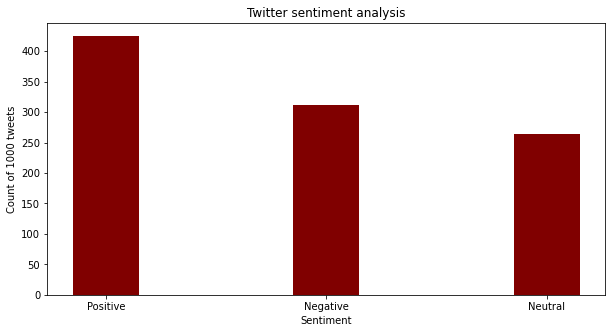

In [46]:
senti=['Positive','Negative','Neutral']
count=[pcount,ncount,ecount]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(senti, count, color ='maroon',
        width = 0.3)
 
plt.xlabel("Sentiment")
plt.ylabel("Count of 1000 tweets")
plt.title("Twitter sentiment analysis")
plt.show()

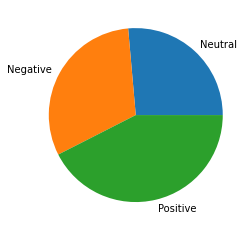

In [48]:
y = np.array([ecount,ncount,pcount])
mylabels = ["Neutral", "Negative", "Positive"]

plt.pie(y, labels = mylabels)
plt.show() 

In [50]:
dfneg=df.loc[df.Sentiment=='Negative']
dfneg

,Sentence,Sentiment
5,gregabbotttx tedcruz first day rescind every ...,Negative
15,hey chrischristie exploiting tragedy 911 poli...,Negative
16,carolcnn donaldtrump fire comment woman peter...,Negative
22,erinmallorylong hate planned parenthood woman...,Negative
24,mrpooni fox news trying convince young black ...,Negative
...,...,...
977,ccalbos huckabee military kill people break t...,Negative
980,realdonaldtrumps arrogance gopdebate used law...,Negative
982,real scary liberal allowed walk around commit...,Negative
985,numbersmuncher donald trump guy flip risk boa...,Negative


In [51]:
dfpos=df.loc[df.Sentiment=='positive']
dfpos

,Sentence,Sentiment
1,scottwalker didnt catch full gopdebate last n...,positive
2,tjmshow mention tamir rice gopdebate held cle...,positive
6,warriorwoman91 liked happy heard going modera...,positive
11,waynedupreeshow woke tweet gopdebate best lin...,positive
12,reading family comment great gopdebate,positive
...,...,...
991,ljcambria realdonaldtrump dont forget vote es...,positive
992,recap gopdebate tenmen want make choice woman...,positive
993,writeintrump made hillary clinton wedding als...,positive
997,crazyclarine lol the3o5flyguy watching gopdeb...,positive


In [53]:
dfneu=df.loc[df.Sentiment=='Neutral']
dfneu

,Sentence,Sentiment
0,nancyleegrahn everyone feel climate change qu...,Neutral
3,robgeorge carly fiorina trending hour debate ...,Neutral
4,danscavino gopdebate realdonaldtrump delivere...,Neutral
7,going msnbc live thomasaroberts around gopdebate,Neutral
8,deer headlight lizzwinstead ben carson may br...,Neutral
...,...,...
981,hour later looking back biggest gaffe gopdeba...,Neutral
988,donald trump democratic spy realdonaldtrump s...,Neutral
995,nerdist got say refreshing hear presidential ...,Neutral
996,gogoaleee deleted account participated kkkorg...,Neutral


In [55]:
dfp=dfpos['Sentence']
dfn=dfneg['Sentence']
dfe=dfneu['Sentence']


Positive words


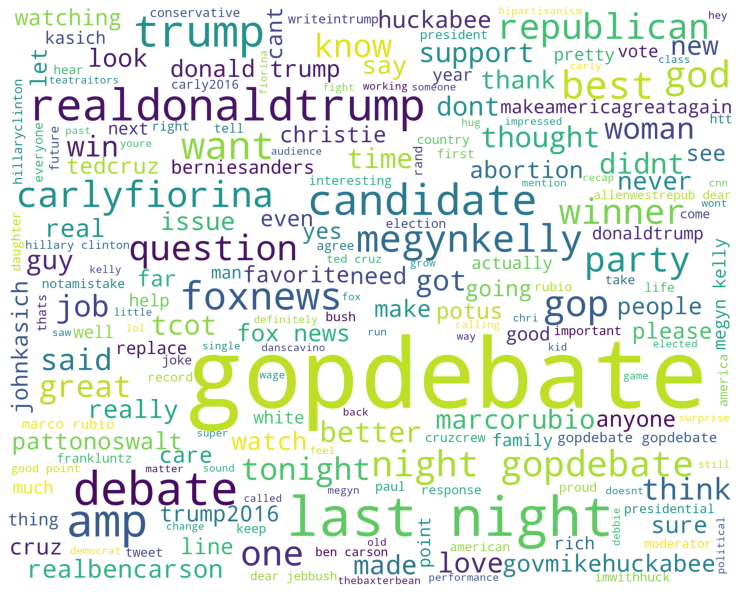

In [58]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(dfp,'white')


Negative words


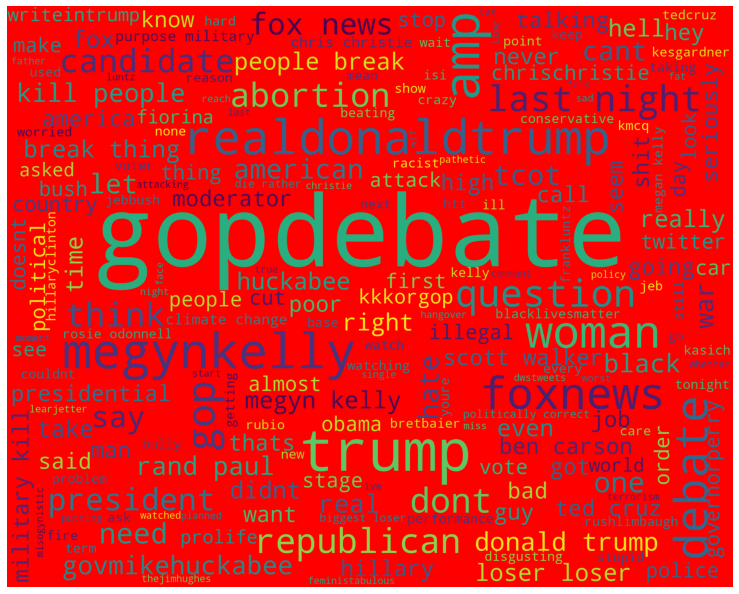

In [62]:
print("Negative words")
wordcloud_draw(dfn,'red')


Neutral words


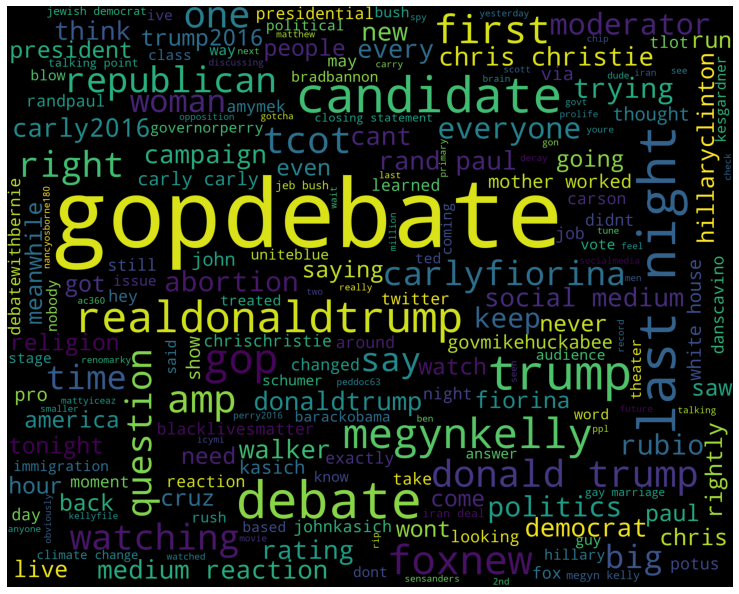

In [63]:
print("Neutral words")
wordcloud_draw(dfe)

In [69]:
import tkinter as tk


In [71]:
master = tk.Tk()


In [72]:
master.title("SENTIMENT ANALYSIS")


''

In [73]:
master.geometry("700x250")


''

In [74]:
e1 = tk.Entry(master)
e2 = tk.Entry(master)

In [78]:
import tkinter as tk
from tkinter import ttk

# root window
root = tk.Tk()
root.geometry('300x200')
root.resizable(False, False)
root.title('Button Demo')

# exit button
exit_button = ttk.Button(
    root,
    text='Exit',
    command=lambda: root.quit()
)

exit_button.pack(
    ipadx=5,
    ipady=5,
    expand=True
)

root.mainloop()